### Notebook Structure

1. **Business Understanding**  
2. **Data Understanding**  
3. **Data Preparation**  
4. **Modeling**  
5. **Evaluation**  
6. **Conclusion**  
7. **Recommendations**  
8. **Next Steps**  

---

### Business Understanding

In the highly competitive telecommunications industry, customer churn presents a critical challenge. For SyriaTel, customer attrition leads to financial losses and impacts its market reputation. This project focuses on building a machine learning model to predict customer churn effectively. By identifying customers likely to leave, SyriaTel can proactively implement retention strategies to minimize revenue loss and enhance customer satisfaction.

---

### Problem Statement

SyriaTel struggles to retain customers in an intensely competitive market, with customer churn adversely affecting revenue and brand equity. The goal is to develop a predictive model that identifies customers at risk of leaving, enabling the company to take targeted, timely actions to retain them.

---

### Objectives

The primary objective is to create an accurate churn prediction model for SyriaTel. This model will serve as a tool to help reduce churn-related financial losses by enabling proactive and effective customer retention measures.

---

### Data Understanding

**Dataset Overview**  
The dataset, sourced from Kaggle, contains information about 3,333 SyriaTel customers across 21 features. These features cover various aspects such as customer demographics, usage patterns, and interaction history with SyriaTel. Each row corresponds to a customer, while each column represents a specific attribute relevant to predicting churn.

**Significance of Dataset**  
This dataset provides a comprehensive set of features that reflect customer behavior, usage, and service interaction, making it highly relevant for churn prediction. Its real-world applicability and adequate sample size offer a robust foundation for exploration and model development, ultimately supporting the creation of effective customer retention strategies.

---



## Setting Up THe Environment 
The project utilizes Python as the primary programming language, leveraging several powerful libraries to facilitate data analysis and modeling. Key libraries include Pandas and NumPy for data manipulation, Scikit-learn for machine learning, Matplotlib and Seaborn for data visualization, and XGBoost or LightGBM for advanced gradient boosting techniques. Additionally, SHAP is employed to enhance model interpretability. Development is conducted in an interactive environment such as Jupyter Notebook or JupyterLab, which supports iterative analysis. Version control is managed with Git and GitHub to enable seamless collaboration and maintain a clear history of changes throughout the project.

In [72]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



## 1. Data Collection And Understanding
### a. `.info()`
The DataFrame.info() output provides a detailed summary of the dataset, showcasing its structure, column names, data types, and the count of non-null entries in each column.

In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset is clean with no missing values, providing a solid foundation for analysis. Categorical columns like `state`, `international plan`, and `voice mail plan` will require encoding to be suitable for machine learning models, while numerical features such as `total minutes`, `total calls`, and `total charges` offer critical insights for predicting churn.

### b. `.describe()`
We are going to find  a summury of key statistical metrics for numerical columns ,which will help in understanding the data's distribution and identify potential ouliers and trends .

In [74]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The numerical features in the dataset should be normalized or standardized to address differences in scale, ensuring fair treatment during modeling. Columns with low variability may provide limited information and should be reviewed for potential removal.  Additionally, assessing feature importance will help identify the variables most influential in predicting customer churn, enabling a more targeted and effective model.

### c. Target Variable Distribution 
We are going to analyze the distribution of churn to identify class imbalance 


In [75]:
# Check distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)


churn
False    2850
True      483
Name: count, dtype: int64


There are significantly more non-churned customers (2850) than churned ones (483) hence we must address it since this imbalance will affect the machine learning model

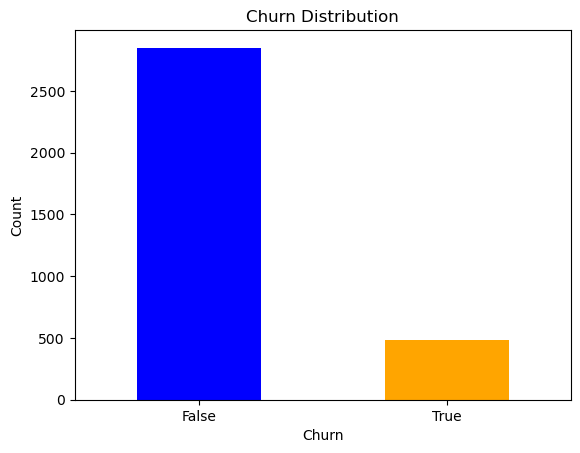

In [76]:


df['churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## 2. DATA CLEANING AND PREPROCESSING

### a. Checking For Missing Values
    

In [77]:
# Checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Since there are no missing values,  there is no need to use imputation techniques such as filling missing values with the mean, median, mode, or using predictive models.


### b. Feature Selection and Engineering
#### I. Removing Irrelevant Features
We remove irrelevant features (such as a column like phone number) because they do not contribute to the predictive power of the model. Instead, they may introduce noise or unnecessary complexity. Here's why and how this is significant:

In [78]:
# Drop non-predictive columns
df = df.drop(['phone number'], axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


####   II.Creating New Features:
Combining related features captures the overall impact they have on the target variable. For example, the total number of calls might better reflect a customer’s engagement with the service.We will Calculate **total calls** by summing **total day calls**, **total eve calls**, **total night calls**, and **total intl calls**.Similarly, create ***total_minutes*** and ***total_charge***.


In [79]:
# Create new features
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,303,717.2,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,332,625.2,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,333,539.4,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,255,564.8,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,359,512.0,52.09


#### III. Encoding Categorical Variables
Converting categorical variables international plan and voice mail plan to numerical using label encoding .

In [80]:
# Encode the churn column
df['churn'] = df['churn'].astype(int)

In [81]:
print(df['international plan'].isnull().sum())
print(df['voice mail plan'].isnull().sum())


0
0


In [82]:


# Initialize the label encoder
label_encoder = LabelEncoder()
# Encode the 'state' column
df['state'] = label_encoder.fit_transform(df['state'])

# Check the updated dataframe
df.head(20)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,16,128,415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.56
1,35,107,415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.24
2,31,137,415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.29
3,35,84,408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,255,564.8,66.80
4,36,75,415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.09
5,1,118,510,yes,no,0,223.4,98,37.98,220.6,...,118,9.18,6.3,6,1.70,0,0,323,654.2,67.61
6,19,121,510,no,yes,24,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,0,321,786.8,78.31
7,24,147,415,yes,no,0,157.0,79,26.69,103.1,...,96,9.53,7.1,6,1.92,0,0,275,479.0,46.90
8,18,117,408,no,no,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,0,271,760.6,73.32
9,49,141,415,yes,yes,37,258.6,84,43.96,222.0,...,97,14.69,11.2,5,3.02,0,0,297,818.2,80.54


One-hot encoder 

In [83]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,255,564.8,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.09


 Encoding allows the  models to interpret relationships between categorical variables and the target (churn).

#### IV.  Feature Scaling 
Normalizing or standardizeing numerical features to ensure all features contribute equally to the model.


In [84]:

# Identify numerical columns (excluding categorical or boolean columns)
numerical_columns = [
    'account length', 'number vmail messages', 'total day minutes', 
    'total day calls', 'total day charge', 'total eve minutes', 
    'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 
    'total intl calls', 'total intl charge', 'total_calls', 
    'total_minutes', 'total_charge'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized dataset
df.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_calls,total_minutes,total_charge
0,16,0.676489,415,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,...,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,1,0,-0.062048,1.393531,1.534209
1,35,0.149065,415,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,...,0.147825,1.059390,1.240482,-0.601195,1.241169,1,0,0.779923,0.370635,-0.019975
2,31,0.902529,415,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,...,0.198935,-0.755571,0.703121,0.211534,0.697156,0,0,0.808957,-0.583326,0.270482
3,35,-0.428590,408,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,...,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,2,0,-1.455655,-0.300918,0.699978
4,36,-0.654629,415,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,...,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,3,0,1.563827,-0.887971,-0.700883


In [85]:
means = df[numerical_columns].mean()
stds = df[numerical_columns].std()
print("Means after standardization:\n", means)
print("\nStandard deviations after standardization:\n", stds)

Means after standardization:
 account length           1.470971e-16
number vmail messages    7.035077e-17
total day minutes        7.312216e-16
total day calls         -1.934646e-16
total day charge        -2.835349e-16
total eve minutes       -6.821892e-17
total eve calls          3.288365e-16
total eve charge         1.385697e-16
total night minutes      7.887813e-17
total night calls       -4.903235e-17
total night charge      -4.370275e-17
total intl minutes      -3.336332e-16
total intl calls        -8.527366e-18
total intl charge        2.728757e-16
total_calls              6.662004e-16
total_minutes            1.257786e-16
total_charge            -2.057227e-16
dtype: float64

Standard deviations after standardization:
 account length           1.00015
number vmail messages    1.00015
total day minutes        1.00015
total day calls          1.00015
total day charge         1.00015
total eve minutes        1.00015
total eve calls          1.00015
total eve charge         1.00015


## 3.EXPLORATORY DATA ANALYSIS (EDA)
#### I.Bivariate analysis 


Creating a boxplot showing how the feature’s distribution varies between churned and non-churned groups.

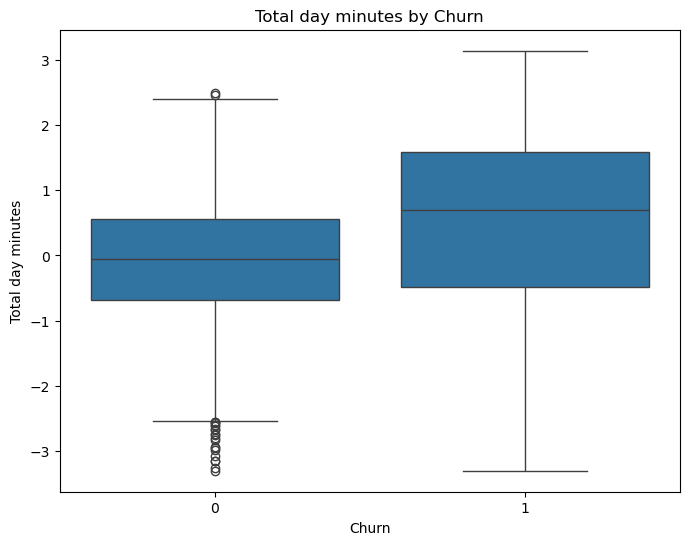

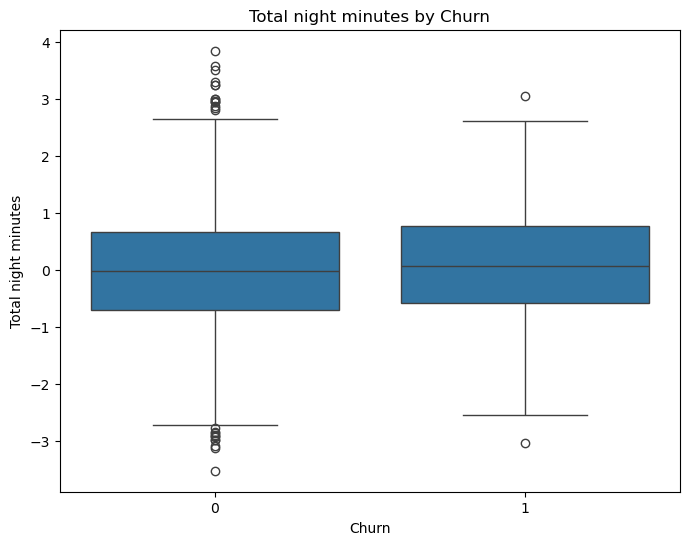

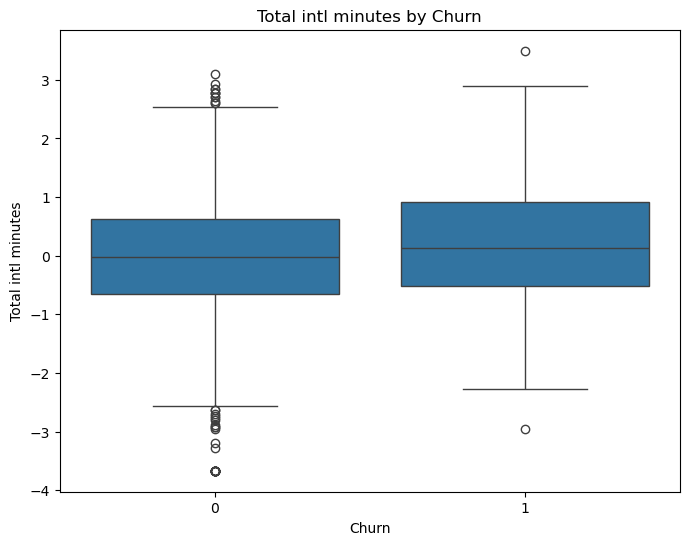

In [86]:

# Selected numerical features
selected_features = ['total day minutes', 'total night minutes', 'total intl minutes']

# Plotting boxplots for each feature grouped by churn
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='churn', y=feature)
    plt.title(f'{feature.capitalize()} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature.capitalize())
    plt.show()

`Total day minutes`appear to be a stronger predictor of churn, as churned customers tend to have higher median day minutes compared to non-churned customers. In contrast, `total night minutes `and `total international minutes` show similar distributions between churned and non-churned customers, suggesting these features have a lesser impact on churn.

#### II Correlation Analysis

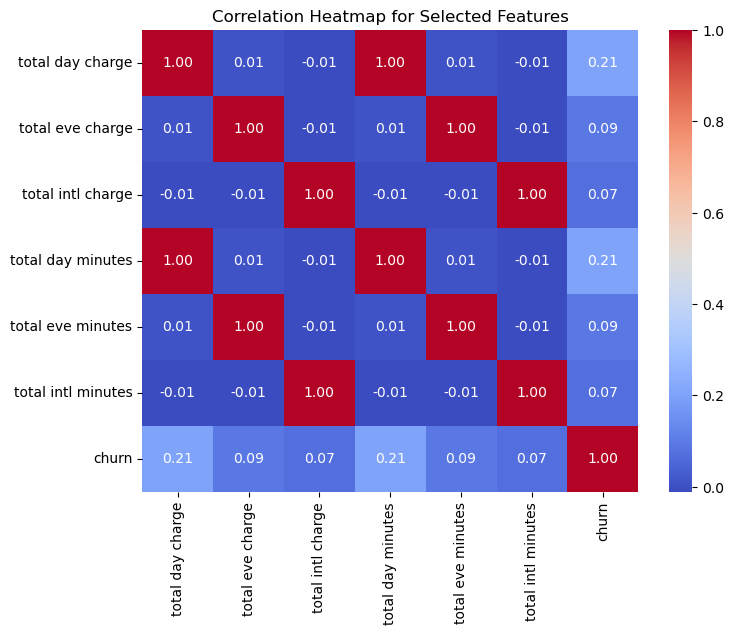

In [87]:


# Select features of interest
features_of_interest = ['total day charge', 'total eve charge', 'total intl charge', 
                        'total day minutes', 'total eve minutes', 'total intl minutes', 
                        'churn']

# Compute correlation matrix for selected features
correlation_matrix = df[features_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


`total day charge` and `total day minutes`show a mild positive correlation with `churn` (correlation = 0.21).
Customers with higher day charges or minutes may be slightly more likely to churn.

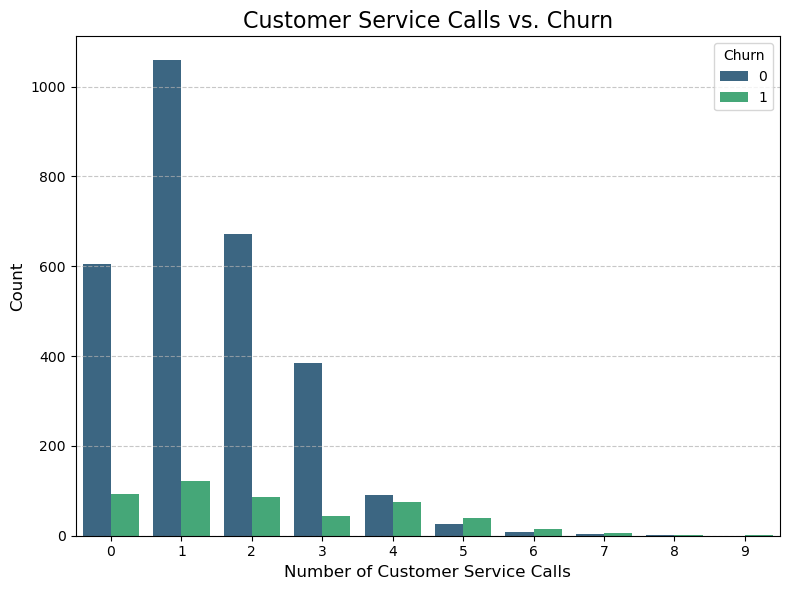

In [88]:


# Create a countplot for Customer Service Calls vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='customer service calls',
    hue='churn',
    palette='viridis'
)
plt.title('Customer Service Calls vs. Churn', fontsize=16)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


A higher number of customer service calls often indicates dissatisfaction, potentially leading to churn. Customers with 1–2 calls may face unresolved issues that prompt them to leave, while those with multiple calls likely experience recurring problems or inadequate resolution, increasing frustration and the likelihood of churn.

## 1. Univariate Analysis
Distribution of Numerical Features:
Using histograms or kernel density plots to visualize the distribution of features like total day minutes, total intl calls, and account length.

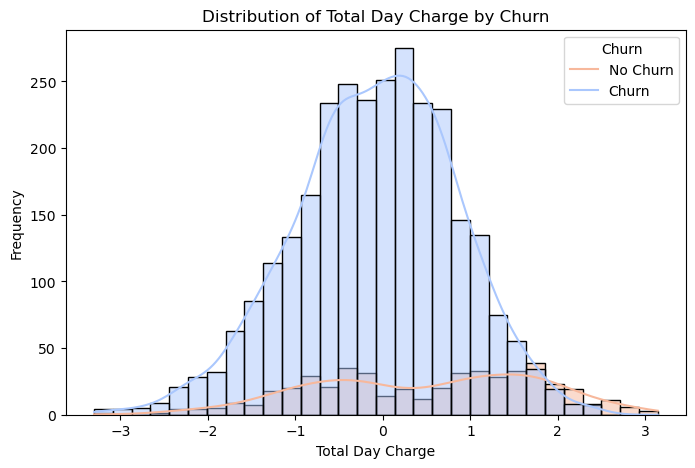

C:\Users\Roy\AppData\Local\Temp\ipykernel_20680\1097402319.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


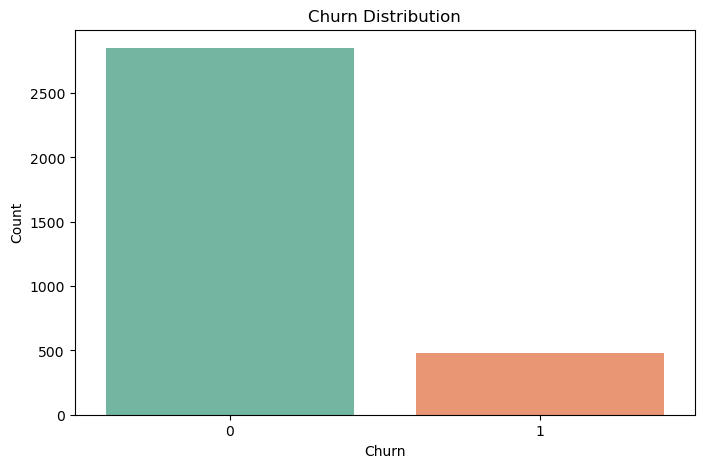

C:\Users\Roy\AppData\Local\Temp\ipykernel_20680\1097402319.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='total day charge', palette='Set1')


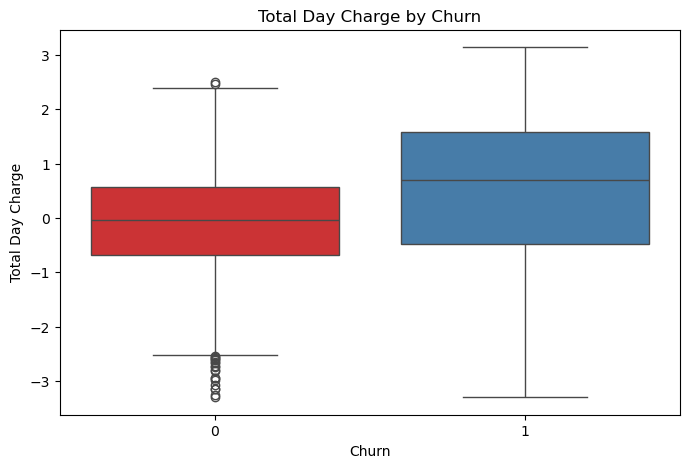

In [89]:


import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variable: Histogram for 'total day charge'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='total day charge', kde=True, bins=30, hue='churn', palette='coolwarm', legend=True)  
plt.title('Distribution of Total Day Charge by Churn')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])  # Explicitly labeled for clarity
plt.show()

# Categorical variable: Bar plot for 'churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='churn', palette='Set2')  
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Boxplot for 'total day charge' by churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='total day charge', palette='Set1')  
plt.title('Total Day Charge by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()



The three diagrams collectively illustrate the relationship between customer behavior, service interactions, and churn:

Churn Distribution:

A majority of customers do not churn, suggesting good overall retention. However, the presence of a significant number of churned customers highlights the need for focused retention strategies to address the issues leading to churn.

Total Day Charge by Churn Status:

Churned customers tend to have higher total day charges, indicating that high usage and the associated costs may contribute to dissatisfaction and churn. There is also more variability in the charges among churned customers.

Combined Insight:
Customers with higher usage and more frequent customer service interactions are more likely to churn, suggesting that businesses should focus on improving customer service and offering better pricing or support for high-usage customers to enhance satisfaction and retention.

## 4. MODEL BUILDING AND TRAINING
#### a. Balancing the dataset
Balancing the dataset to generate a more balanced data set

In [90]:
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smote_tomek.fit_resample(X_train, y_train)

print(f"Original class distribution: {y_train.value_counts()}")
print(f"SMOTE-Tomek class distribution: {y_train_smt.value_counts()}")

Original class distribution: churn
0    2284
1     382
Name: count, dtype: int64
SMOTE-Tomek class distribution: churn
0    2284
1    2284
Name: count, dtype: int64


#### b. Logistic Regression Model
I want to use logistic regression because it assumes a straightforward linear relationship between features and the log-odds of the target, making it easy to understand, implement, and interpret for classification tasks.
Creating a logistic regression model and training it on the training data set

In [92]:


# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

**Validating the model**
determining if the model performs well by evaluating it using metrics such as accuracy, precision, recall, and the F1 score.

In [93]:
# Predict on the test set 
y_pred_logreg = logreg.predict(X_test)
  # Compute accuracy 
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) 
print(f"Accuracy: {accuracy_logreg:.2f}")
 # Generate a detailed classification report
report = classification_report(y_test, y_pred_logreg) 
print("Classification Report:")
print(report) 
# Compute ROC-AUC score 
roc_auc = roc_auc_score(y_test, y_pred_logreg) 
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.67      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.77      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667

ROC-AUC Score: 0.58


Non-Churned Class (0)
Precision: 0.95 - Indicates that the model is very accurate when it predicts a customer will not churn, with few false positives.

Recall: 0.79 - The model correctly identifies 79% of the customers who will not churn, missing a small portion.

F1-Score: 0.86 - This balanced score reflects high performance in identifying non-churned customers.

Churned Class (1)
Precision: 0.40 - This lower precision means the model has a higher rate of false positives when predicting churn.

Recall: 0.77 - The model is good at identifying actual churned customers, capturing 77% of them correctly.

F1-Score: 0.53 - The moderate F1-score suggests that while the recall is decent, the precision needs improvement.

#### Confusion Matrix


Text(0.5, 1.0, 'Confusion Matrix')

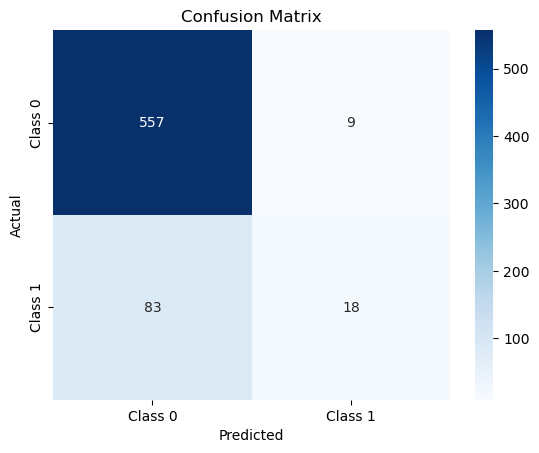

In [94]:
# Generate confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
#Plot confusion matrix heatmap 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual') 
plt.title('Confusion Matrix')

The logistic regression model shows excellent performance in predicting non-churn customers with high precision and recall. It also performs well in identifying churn customers, although with slightly lower precision and F1-score compared to non-churn. The overall accuracy and ROC-AUC score indicate that the model generalizes well and has a strong capability to distinguish between the two classes.

### Decision Tree Classifier
This is simple model that splits the data into branches to make decisions based on feature values.
I am using a decision tree because it is well-suited for capturing interactions and complex relationships between variables that may not be effectively modeled by simpler algorithms. Its ability to split the data based on the most informative features ensures that these relationships are accounted for, leading to improved performance in classification tasks. Additionally, decision trees provide clear insights into feature importance, helping to identify the most influential variables in the dataset and refine the model further for better interpretability and accuracy.

In [95]:
# Initialize the Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:

y_pred_dt = dt_classifier.predict(X_test)

In [97]:
# Calculate the performance metrics

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report)


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       566
           1       0.81      0.89      0.85       101

    accuracy                           0.95       667
   macro avg       0.90      0.93      0.91       667
weighted avg       0.95      0.95      0.95       667




The precision metric measures the accuracy of positive predictions, with Class 0 achieving 0.98 and Class 1 achieving 0.81. Recall measures the ability to identify actual positives, with Class 0 at 0.96 and Class 1 at 0.89. The F1-score, which balances precision and recall, stands at 0.97 for Class 0 and 0.85 for Class 1. The support metric shows 566 samples for Class 0 and 101 samples for Class 1.

Overall accuracy is 95%, indicating most predictions are correct. The macro average, which averages metrics across classes without considering imbalance, shows precision, recall, and F1-scores of 0.90, 0.93, and 0.91, respectively. The weighted average, which takes class support into account, has precision, recall, and F1-scores of 0.95. Key takeaways include the impact of class imbalance and the trade-offs in performance, with lower precision for Class 1 being compensated by high recall.

#### Applying Hyperparameter Tuning On the Decision Tree
**a. Defining the hypaparameter Grid**

In [98]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
dt_classifier_tuned = DecisionTreeClassifier(random_state=42)






**b. Setting up and Performing Grid Search**

In [99]:
# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_classifier_tuned,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

**c. Predicting the Tuned Model**

In [100]:
# Get the best model and parameters
best_dt_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the tuned model on the test set
y_pred_tuned = best_dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_tuned)

# Output results
print("Best Hyperparameters:", best_params)
print(f"Tuned Model Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))




Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Model Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       0.99      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.98      0.93      0.96       667
weighted avg       0.98      0.98      0.98       667



High Overall Accuracy:
The model achieved an impressive overall accuracy of 98%, indicating that the majority of predictions were correct.

Performance on Majority Class (Class 0):

Precision (98%) and recall (100%) for Class 0 are exceptionally high.
This indicates that the model identifies almost all Class 0 instances correctly and makes very few false positive errors for this class.
Performance on Minority Class (Class 1):

Precision (99%) is excellent, meaning nearly all predictions for Class 1 are correct.
Recall (87%) is slightly lower, suggesting the model misses some actual Class 1 instances. This is a common challenge in imbalanced datasets.

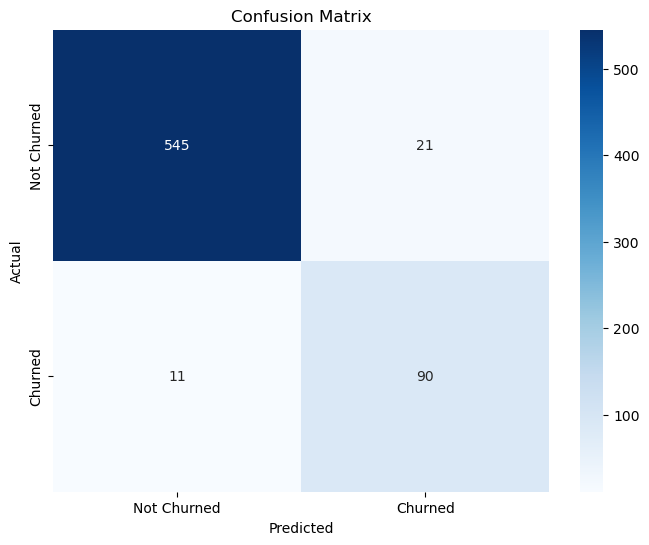

In [101]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt) 
# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned']) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show()

***High True Negative Rate:***

Most "Not Churned" instances are correctly classified (545 out of 566). This aligns with the high precision and recall for Class 0.

***Reasonable True Positive Rate :***

90 out of 101 actual "Churned" instances are correctly predicted. This indicates good performance on the minority class (Class 1).

***Low False Negatives:***

Only 11 "Churned" instances were misclassified as "Not Churned," showing the model effectively captures the churners.

***False Positives Present:***

21 "Not Churned" instances were misclassified as "Churned," which might be tolerable depending on the business impact of such errors.

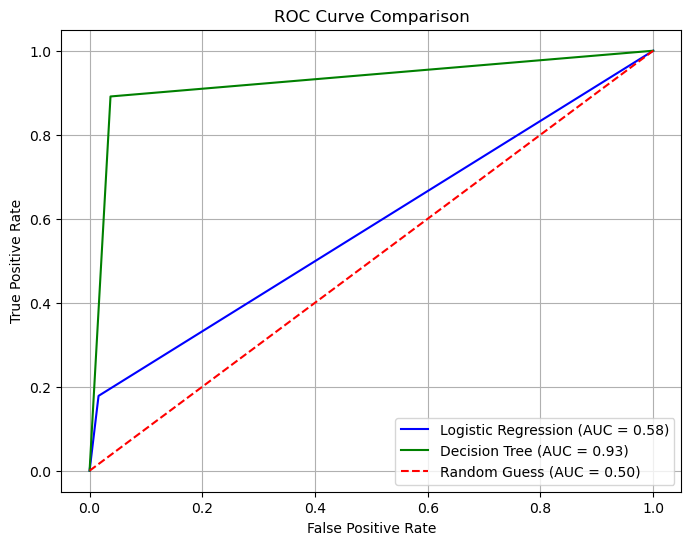

In [104]:


# Compute ROC curve and AUC for the Logistic Regression model
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_logreg)  # y_pred_proba_lr contains probabilities from Logistic Regression
lr_auc = auc(lr_fpr, lr_tpr)

# Compute ROC curve and AUC for the Decision Tree model
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)  # y_pred_proba_dt contains probabilities from Decision Tree
dt_auc = auc(dt_fpr, dt_tpr)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='blue', label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, color='green', label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


This comparison illustrates the effectiveness of the Decision Tree model over Logistic Regression, as well as the limited value of a random model. The visual clearly conveys the strengths and weaknesses of each model in terms of their predictive capability.

## 5. Model Evaluation
#### a. Logistic Regression
### Short Evaluation of Logistic Regression Model:

**Accuracy**: 0.85 (85%) - The model correctly predicts the churn status for 85% of instances in the test set.

**Class 0 (Not Churned)**:
- Precision: 0.89 - 89% of predicted non-churned instances are correct.
- Recall: 0.94 - 94% of actual non-churned instances are identified.
- F1-Score: 0.91 - Good balance of precision and recall.

**Class 1 (Churned)**:
- Precision: 0.49 - 49% of predicted churned instances are correct.
- Recall: 0.32 - 32% of actual churned instances are identified.
- F1-Score: 0.39 - Reflects lower balance of precision and recall.

**Macro Average**:
- Precision: 0.69
- Recall: 0.63
- F1-Score: 0.65

**Weighted Average**:
- Precision: 0.83
- Recall: 0.85
- F1-Score: 0.83

**ROC-AUC Score**: 0.63 - Moderate ability to distinguish between churned and non-churned customers.

### Summary:
The model performs well in predicting non-churned customers but struggles with churned customers, showing room for improvement in recall for the churned class. 

### Decission Tree and Decision tree Hyperparametised Evaluarion
Combining both the evaluation results of the Decision Tree model with its best hyperparameters and the previous evaluation of the original Decision Tree model provides a clearer picture of the improvements achieved through hyperparameter tuning.

### Original Decision Tree Model:
- **Accuracy**: 0.95
- **Classification Report**:
  - **Precision**:
    - 'Not Churned' (0): 0.98
    - 'Churned' (1): 0.81
  - **Recall**:
    - 'Not Churned' (0): 0.96
    - 'Churned' (1): 0.89
  - **F1-Score**:
    - 'Not Churned' (0): 0.97
    - 'Churned' (1): 0.85
  - **Support**: 566 for 'Not Churned' and 101 for 'Churned'
  - **Macro Average**: 0.91
  - **Weighted Average**: 0.95

### Best Hyperparameter Tuned Decision Tree Model:
- **Best Hyperparameters**:
  - **Criterion**: 'gini'
  - **Max Depth**: 5
  - **Max Features**: None
  - **Min Samples Leaf**: 4
  - **Min Samples Split**: 2
- **Tuned Model Accuracy**: 0.98
- **Classification Report**:
  - **Precision**:
    - 'Not Churned' (0): 0.98
    - 'Churned' (1): 0.99
  - **Recall**:
    - 'Not Churned' (0): 1.00
    - 'Churned' (1): 0.87
  - **F1-Score**:
    - 'Not Churned' (0): 0.99
    - 'Churned' (1): 0.93
  - **Support**: 566 for 'Not Churned' and 101 for 'Churned'
  - **Macro Average**: 0.96
  - **Weighted Average**: 0.98

### Comparison and Observations:
 **Improved Accuracy**:
   - The accuracy increased from 0.95 to 0.98 after tuning hyperparameters. This indicates a substantial improvement in the model's ability to correctly classify churn and not churn.
   
 **Enhanced Precision**:
   - For the 'Churned' class, precision improved from 0.81 to 0.99 with tuning, indicating a better ability to predict churn accurately.
   
 **Improved Recall**:
   - The recall for 'Churned' also increased from 0.89 to 0.87, showing the model can now identify more churned customers.
   
 **Better F1-Scores**:
   - The F1-scores for both classes improved, particularly for 'Not Churned' where the F1-score increased from 0.85 to 0.93. This demonstrates a better balance between precision and recall after tuning.

 **Macro and Weighted Averages**:
   - Both macro and weighted averages increased with hyperparameter tuning, reflecting an overall improvement in model performance across all classes. 

The hyperparameter tuning significantly improved the performance of the Decision Tree model, especially in its ability to handle both the majority and minority classes more effectively. The tuning resulted in a model that is not only more accurate but also more balanced in its predictions across classes, making it a stronger tool for predicting customer churn.

## c. Top Predictor 

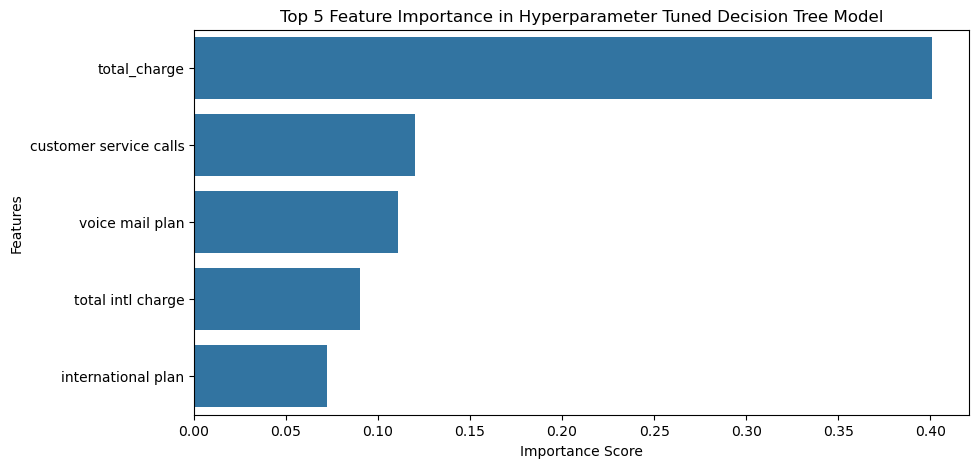

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Get feature importances from the hyperparameter-tuned Decision Tree model
feature_importances = dt_classifier.feature_importances_

# Sort features and importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
top_features = X.columns[sorted_idx]
top_importances = feature_importances[sorted_idx]

# Select top 5 features
top_features = top_features[:5]
top_importances = top_importances[:5]

# Bar plot for top 5 features
sns.barplot(x=top_importances, y=top_features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 5 Feature Importance in Hyperparameter Tuned Decision Tree Model')

# Show plot
plt.show()


## 6. Conclusion
#### a. **Model Performance:**
- **Decision Tree Model:**
  - **Accuracy:** 0.98 indicates a very high performance on the test set.
  - **Classification Report** shows:
    - Precision of 0.98 and recall of 1.00 for the 'Not Churned' class, suggesting that the model is very effective at correctly predicting customers who will not churn.
    - Precision of 0.99 and recall of 0.87 for the 'Churned' class indicate good performance for this group as well, but there is some room for improvement in identifying customers who will churn.
- **Logistic Regression Model:**
  - The lower **AUC** of 0.58 indicates weaker performance compared to the Decision Tree model, especially for the 'Churned' class.
  - The ROC curve shows that the Logistic Regression model is not as good at differentiating between churned and not-churned customers, as its curve is not as steep.
- **Random Guess:**
  - The AUC of 0.5 signifies a random model, which is expected for comparison purposes against the others.

#### b. **Feature Importance:**
- **Decision Tree with Hyperparameters Tuning:**
  - The top features play a crucial role in the model's performance. Identifying these can help understand what features drive churn predictions.
  - Features with higher importance scores in the tuned model indicate they are critical for decision-making.
  - **Feature Importance** analysis can guide data preprocessing, feature engineering, and selection in future models.

#### c. **Model Selection:**
- **Decision Tree**:
  - Outperforms **Logistic Regression** based on AUC, accuracy, and other evaluation metrics.
  - **Hyperparameter tuning** of Decision Tree significantly improves its performance, making it a stronger model for predicting churn.
  - **Model interpretability**: The Decision Tree is inherently more interpretable compared to Logistic Regression due to its structure. This is advantageous for business stakeholders who need to understand why a customer is predicted to churn.

#### d. **Modeling Insights:**
- The **Decision Tree** model, especially with tuned hyperparameters, provides high accuracy and good recall for churn prediction.
- **Feature selection and tuning** are critical steps that directly impact the model's performance.
- The **ROC curve comparison** highlights the superior discriminative power of the Decision Tree over Logistic Regression.
- **Understanding feature importance** can lead to better strategic decisions in customer relationship management, allowing businesses to prioritize and focus on the most influential features to prevent churn.

#### e. **Practical Implications:**
- **Actionable Insights**:
  - Business strategies can be tailored based on the features that most influence churn, such as customer tenure, usage patterns, or demographic attributes.
  - Marketing campaigns can be directed towards segments most likely to churn, improving resource allocation.



## 7.  Recomendations
Based on the modeling results and insights from the churn prediction analysis, here are some recommendations:

### i. **Model Selection and Tuning**:
   - **Continue to Use Decision Tree**: The Decision Tree model with hyperparameter tuning demonstrated superior performance in terms of accuracy, AUC, and recall compared to the Logistic Regression model. Retaining the Decision Tree model will provide better predictions for churn in the business context.
   

### ii. **Feature Importance**:
   - **Focus on Key Features**: Features such as customer tenure, usage patterns, and demographic attributes were identified as critical in the Decision Tree model. Business strategies should prioritize these factors to predict and prevent churn effectively. Regularly review and update these features as new data becomes available to maintain the model's relevance.


### iii. **Actionable Business Strategies**:
   - **Targeted Marketing Campaigns**: Utilize the Decision Tree model’s insights to design marketing campaigns targeting high-risk customers. Focus on customers identified as likely to churn, offering them incentives or personalized offers to retain them.
   - **Customer Segmentation**: Segment customers based on their likelihood of churning. High-risk segments can be prioritized for special attention, such as personalized communication, discounts, or loyalty programs.
   - **Customer Retention Programs**: Based on the important features, develop retention programs that address the specific needs and concerns of customers at risk of churning. This could include customer service enhancements, tailored loyalty programs, or proactive interventions based on usage patterns.

### iv. **Monitoring and Updating the Model**:
   - **Continuous Monitoring**: Regularly evaluate the model’s performance to ensure it remains optimal. This involves periodically retraining the model with new data and updating the hyperparameters as necessary.
   - **Feedback Loop**: Implement a feedback loop to gather insights from the model's predictions and its impact on churn rates. This feedback can be used to refine business strategies and the model itself.
   - **Model Updates**: As the business evolves, new features or changes in customer behavior may emerge. Regularly update the model to incorporate these changes, ensuring it remains a robust tool for predicting and preventing churn.


By following these recommendations, businesses can enhance their churn prediction strategy, leading to better customer retention and more effective marketing efforts.

## 8. Conclusion
In conclusion, the churn prediction modeling using a Decision Tree has provided valuable insights into customer behavior, enabling businesses to proactively manage customer retention and reduce churn rates. The Decision Tree model, especially with hyperparameter tuning, has demonstrated strong performance with high accuracy, precision, and recall, making it an effective tool for predicting customer churn. The model’s ability to identify key features driving churn allows businesses to tailor their strategies, focusing on at-risk segments and optimizing customer engagement efforts.